# Wooldridge Simple & Multiple OLS Linear Regression using Python
**Author:**
Brahim Zirari <br>
**Version:**
Python 3.13.5 <br>
**Topic:** <br>
* This notebook contains an example about simple & Multiple linear regression model as well as diagnostics from Introductory Econometrics: A Modern Approach, 5e by Jeffrey M. Wooldridge. <br>
**Source** Book. 
<a href = "https://www.amazon.com/Introductory-Econometrics-Modern-Approach-Economics/dp/1111531048" > Click here </a>

# Import Important Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to draw multiple plots
%matplotlib inline    

# Now, install and load the wooldridge package and lets get started!

# Chapter 2: The Simple Regression Model
**Example 2.2:** a Simple Wage equation <br>

**A model relating a person’s wage to observed education and other unobserved factors is** <br>

$$
wage_i = {\beta}_0 + {\beta}_1 \, educ_i + u_i
$$

**wage is measured in dollars per hour** <br>
**educ is years of education, then b1 measures:** <br>
The change in hourly wage given another year of education, holding all other factors fixed.
Some of those factors include labor force experience, innate ability, tenure with current
employer, work ethic, and numerous other things. <br>

In [2]:
#!pip install wooldridge
import wooldridge as wl

In [4]:
print(dir(wl))

['__all__', '__author__', '__builtins__', '__cached__', '__copyright__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'abspath', 'data', 'dataWoo', 'join', 'load_data', 'lst', 'os', 'pd', 'split']


In [5]:
print(help(wl))

Help on package wooldridge:

NAME
    wooldridge - Github page: https://github.com/spring-haru/wooldridge

PACKAGE CONTENTS
    datasets (package)
    description (package)
    load_data

FUNCTIONS
    data(name=None, description=False)

    dataWoo(name=None, description=False)

DATA
    __all__ = ['data', 'dataWoo']
    __copyright__ = 'Copyright (c) 2024 Tetsu Haruyama'

VERSION
    0.4.5

AUTHOR
    Tetsu Haruyama

FILE
    c:\anaconda\lib\site-packages\wooldridge\__init__.py


None


Load the wage1 data and check out the documentation.

In [3]:
wl.dataWoo(name = "wage1", description= True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [4]:
df = wl.dataWoo(name = "wage1")
print(df.head())

   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1.175573      48

Exploratory Data Analysis (EDA)

In [9]:
wage = df["wage"]
educ = df["educ"]

Estimate kernel density:

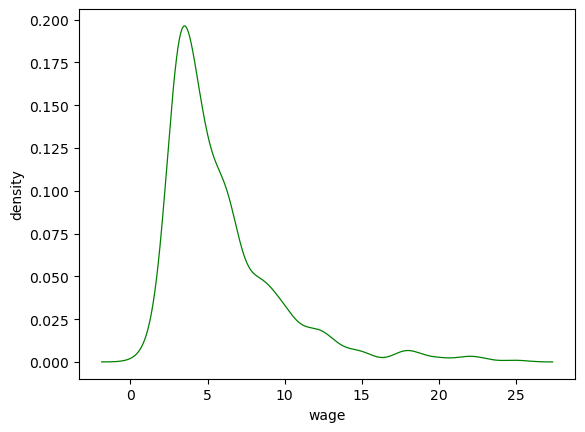

In [11]:
import statsmodels.api as sm
kde = sm.nonparametric.KDEUnivariate(wage)
kde.fit()
# subfigure a (kernel density):
plt.plot(kde.support, kde.density, color="green", linewidth=0.9)
plt.ylabel("density")
plt.xlabel("wage")
plt.show()

Plotting scatter plot between wage and educ

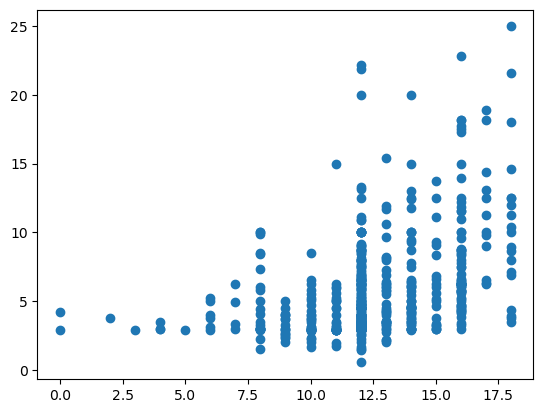

In [14]:
plt.scatter(educ,wage)
plt.show()

In [12]:
#Skewness and Kurtosis
from scipy.stats import skew, kurtosis
print("Skew coef :", skew(wage)) #compared to 0
print("Kurtosis coef:", kurtosis(wage)) #compared to 0

Skew coef : 2.0073250401421583
Kurtosis coef: 4.970082831531241


Descreptive statistics:

In [16]:
dta = df.iloc[:,[0,1]] #dta is a subset from df

In [18]:
DescriptiveStatistics = dta.describe()
print(DescriptiveStatistics)

             wage        educ
count  526.000000  526.000000
mean     5.896103   12.562738
std      3.693086    2.769022
min      0.530000    0.000000
25%      3.330000   12.000000
50%      4.650000   12.000000
75%      6.880000   14.000000
max     24.980000   18.000000


Download the table as word document

In [33]:
!pip install python-docx

In [19]:
from docx import Document

# Create a new Word document
document_desc = Document()

# Add a title
document_desc.add_heading('DescriptiveStatistics', 0)

# Add the descriptive statistics as a table
# Get the column names (index) and add them as the first column
columns = DescriptiveStatistics.index.tolist()
# Add the column names from the describe output as header row
header = DescriptiveStatistics.columns.tolist()
table_desc = document_desc.add_table(rows=len(columns) + 1, cols=len(header) + 1)

# Add header row
table_desc.cell(0, 0).text = "Statistic"
for j, col in enumerate(header):
    table_desc.cell(0, j + 1).text = str(col)

# Add data rows
for i, col_name in enumerate(columns):
    table_desc.cell(i + 1, 0).text = str(col_name)
    for j, col_data in enumerate(header):
        table_desc.cell(i + 1, j + 1).text = f"{DescriptiveStatistics.loc[col_name, col_data]:.4f}"
# Save the document
document_desc.save('descriptive_statistics.docx')

Plotting  Boxplot:

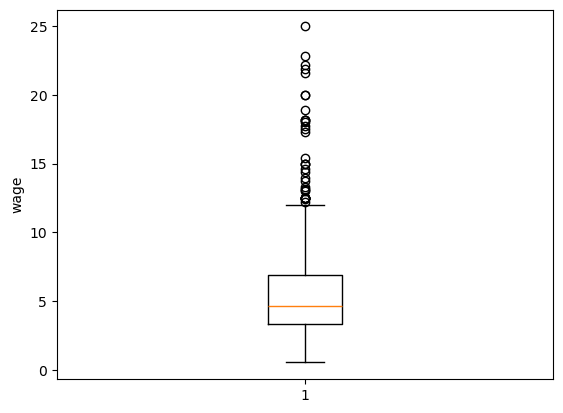

In [21]:
plt.boxplot(wage, vert=True)
plt.ylabel("wage")
plt.show()

# Simple OLS Linear Regression Manual Calculation

In [23]:
# ingredients to the OLS formulas:
cov_xy = np.cov(educ,wage)[0,1]
print(cov_xy)
# The output is a 2x2 covariance matrix where:
# The element at [0,0] is the variance of x.
# The element at [1,1] is the variance of y.
# The element at [0,1] is the covariance of x with y.
# The element at [1,0] is the covariance of y with x. 
var_x = np.var(educ)
x_bar = np.mean(educ)
y_bar = np.mean(wage)
# manual calculation of OLS coefficients:
b1_hat = cov_xy / var_x
b0_hat = y_bar - b1_hat * x_bar
print("b1_hat is:", b0_hat)
print("b0_hat is:", b1_hat)

4.150863998572982
b1_hat is: -0.9178058105986358
b0_hat is: 0.5423904151502517


# Simple OLS Linear Regression Using statsmodels.api 

In [24]:
import statsmodels.api as sm
x = educ
y = wage
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()

Print the summary of the results.

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           2.78e-22
Time:                        10:18:14   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

# Simple OLS Linear Regression Using statsmodels.formula.api 

In [26]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'y~x', data = df)
results = model.fit()
print(results.summary())
par = results.params
print(par)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           2.78e-22
Time:                        10:18:17   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

Results functions / tools

In [27]:
#results.summary()
#results.params
#results.fittedvalues y_hat
#results.resid  

Plot the wage vs educ, adding a line representing the least squares fit.

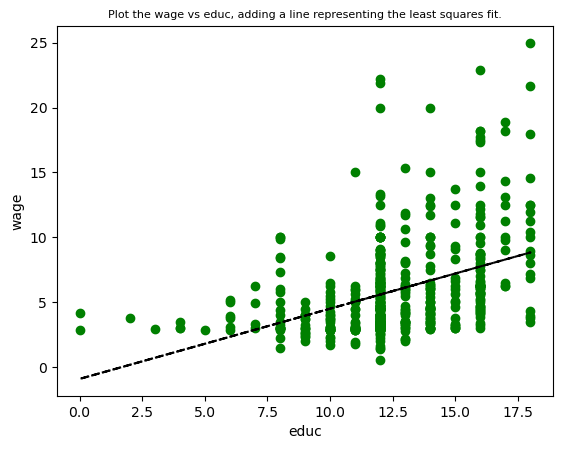

In [28]:
# scatter plot and fitted values:
plt.scatter(x, y, color= "green", marker="o")
plt.plot(x, results.fittedvalues, color="black", linestyle="--")
#plt.plot(x, results.fittedvalues, "--r")

plt.title("Plot the wage vs educ, adding a line representing the least squares fit.", size= 8)
plt.ylabel("wage")
plt.xlabel("educ")
plt.show()

Obtain predicted values and residuals:

In [29]:
y_hat = results.fittedvalues
u_hat = results.resid
table = pd.DataFrame({"educ": x,
"wage": y,
"wage_hat": y_hat,
"residuals": u_hat})

print(table.head(10))

#5.05 = -0.90 + 0.54*11
#5.59 = -0.90 + 0.54*12

   educ   wage  wage_hat  residuals
0    11   3.10  5.050100  -1.950100
1    12   3.24  5.591459  -2.351459
2    11   3.00  5.050100  -2.050100
3     8   6.00  3.426022   2.573978
4    12   5.30  5.591459  -0.291459
5    16   8.75  7.756896   0.993104
6    18  11.25  8.839615   2.410385
7    12   5.00  5.591459  -0.591459
8    12   3.60  5.591459  -1.991460
9    17  18.18  8.298256   9.881745


Check OLS Properties

In [30]:
# obtain coefficients, predicted values and residuals:
b = results.params
print(b)
y_hat = results.fittedvalues
u_hat = results.resid
# confirm property (1):
u_hat_mean = np.mean(u_hat)
print("u_hat_mean:", u_hat_mean)
# confirm property (2):
x_u_cov = np.cov(x, u_hat)[1, 0]
print("x_u_cov:", x_u_cov)
# confirm property (3):
x_mean = np.mean(x)
y_pred = b.iloc[0] + b.iloc[1] * x_mean #y_hat function
print("y_pred:", y_pred)
y_mean = np.mean(y_pred)
print("y_mean:", y_mean)

Intercept   -0.904852
x            0.541359
dtype: float64
u_hat_mean: -8.159083885914459e-15
x_u_cov: 1.258675703346463e-15
y_pred: 5.896102674787044
y_mean: 5.896102674787044


# Multiple Regression Analysis

In [32]:
model = smf.ols("wage~educ + exper + tenure", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           3.41e-41
Time:                        10:18:46   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8727      0.729     -3.941      0.0

# Regression Diagnostics

## Heteroscedasticity Tests

1. Breusch-Pagan Lagrange Multiplier test

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan

name = ["breuschpagan statistic", "p-value"]
test = het_breuschpagan(results.resid, results.model.exog)
list(zip(name, test))

[('breuschpagan statistic', np.float64(43.095617434641106)),
 ('p-value', np.float64(2.3486063795662544e-09))]

2. Lagrange Multiplier Heteroscedasticity Test by White

In [67]:
from statsmodels.stats.diagnostic import het_white

name = ["White  statistic", "p-value"]
test = het_white(results.resid, results.model.exog)
list(zip(name, test))

[('White  statistic', np.float64(20.741466032626786)),
 ('p-value', np.float64(0.013849153279925664))]

In [64]:
df[:]

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


# Autocorrelation Tests

1. Breusch-Godfrey Lagrange Multiplier tests for residual autocorrelation.

In [69]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey 
name = ["breusch_godfrey statistic", "p-value"]

test = acorr_breusch_godfrey(results, nlags=None, store=False)
list(zip(name, test))

[('breusch_godfrey statistic', np.float64(10.73517937005533)),
 ('p-value', np.float64(0.3785187866742687))]

# Multicollinearity Tests

1. Correlation matrix

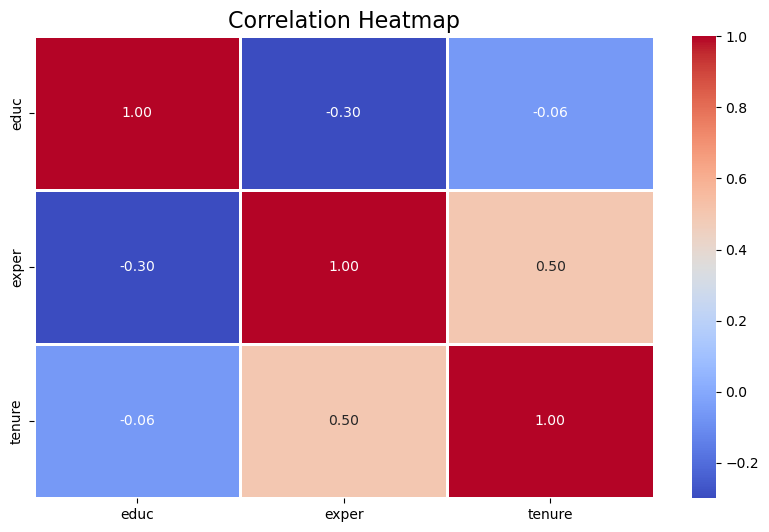

In [78]:
import seaborn as sns
df_mlr = df.iloc[:, [0,1,2,3]]
df_mlr_without_y = df_mlr.drop("wage", axis=1)
# Correlation matrix
correlation_matrix = df_mlr_without_y.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)

# Title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Show the heatmap
plt.show()

In [79]:
#df.corr()
#df_mlr = df.iloc[:,[0,1,2,3]]
#print(df_mlr)
#df_mlr.corr()
print(df_mlr_without_y)

     educ  exper  tenure
0      11      2       0
1      12     22       2
2      11      2       0
3       8     44      28
4      12      7       2
..    ...    ...     ...
521    16     14       2
522    10      2       0
523    15     13      18
524    16      5       1
525    14      5       4

[526 rows x 3 columns]


2. Variance Inflation Fctor VIF

In [84]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_mlr_without_y.columns

# Calculate VIF and round to 4 decimal places
print(df_mlr_without_y.shape[1])
vif_data["VIF"] = [round(variance_inflation_factor(df_mlr_without_y.values, i), 4) for i in range(df_mlr_without_y.shape[1])]
# Sort VIF values in descending order
#vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif_data)

3
  feature     VIF
0    educ  2.1160
1   exper  2.9207
2  tenure  2.0075


# Normality and Distribution Tests

1. Jarque Bera Test

In [85]:
from scipy.stats import jarque_bera
name = ["Jarque-Bera test", "Chi^2 two-tail prob."]
test = jarque_bera(results.resid)
list(zip(name, test))

[('Jarque-Bera test', np.float64(650.8075112915257)),
 ('Chi^2 two-tail prob.', np.float64(4.7746828810973804e-142))]

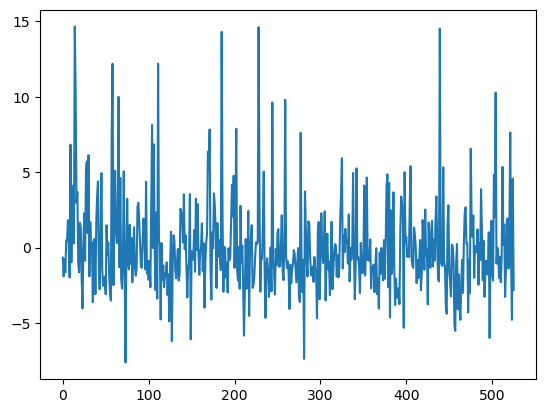

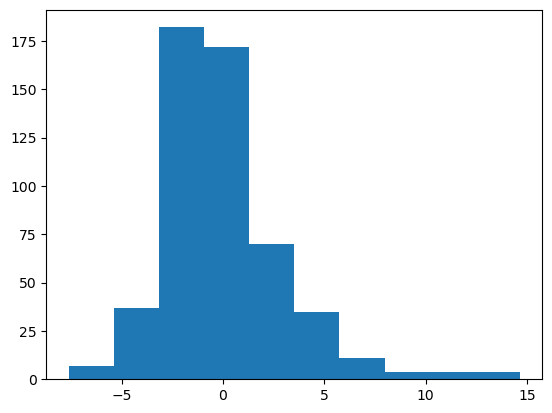

In [89]:
plt.plot(results.resid)
plt.show()
plt.hist(results.resid)
plt.show()